# Loading up modules and dataset

In [1]:
import matplotlib
import pandas as pd
import numpy as np
from pandas import DataFrame
from pandas import ExcelWriter
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import statistics
from sklearn import linear_model

featuresdf = pd.read_csv("TrainingSetValues.csv")
labelsdf = pd.read_csv("TrainingSetLabels.csv")

# Data Cleaning 

In [2]:
featuresdf['status_group'] = labelsdf['status_group'].values
yvals = []
for i in featuresdf['status_group'].unique():
    s = i.replace(' ', '_')
    yvals.append(s)
    featuresdf[s] = pd.get_dummies(featuresdf['status_group'])[i]

    
# f = featuresdf['status_group'].unique()
# def relabel(row):
#     for i in range(len(f)):
#         if row['status_group'] == f[i]:
#             return i
# featuresdf['status_group_relabel'] = featuresdf.apply(lambda row: relabel(row), axis = 1)





# Pivot Table for the 3Ms and Plotting

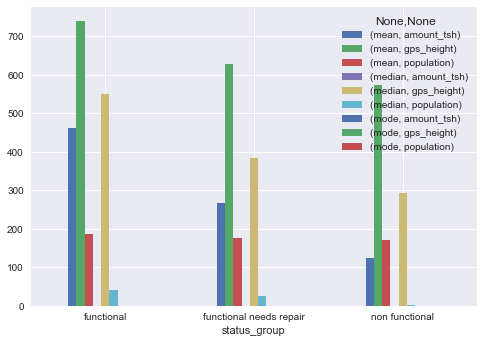

In [3]:
# do a table for status group and show the mean population
pivot1 = featuresdf.pivot_table(index="status_group",values=["amount_tsh","population", "gps_height"],aggfunc=[np.mean,np.median,statistics.mode])

ax = pivot1.plot.bar(rot = 0)
plt.show()

# Run Logit for each dummy variable

In [4]:
for i in yvals:
    lreg1 = smf.logit(formula = i + '~ amount_tsh + population', data = featuresdf).fit()
    
    print (lreg1.summary())
    print('')
    
    # odds ratios
    print ("Odds Ratios")
    print (np.exp(lreg1.params))
    
    # odd ratios with 95% confidence intervals
    params = lreg1.params
    conf = lreg1.conf_int()
    conf['OR'] = params
    conf.columns = ['Lower CI', 'Upper CI', 'OR']
    print (np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.683368
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             functional   No. Observations:                59400
Model:                          Logit   Df Residuals:                    59397
Method:                           MLE   Df Model:                            2
Date:                Mon, 04 Dec 2017   Pseudo R-squ.:                0.008793
Time:                        10:05:18   Log-Likelihood:                -40592.
converged:                       True   LL-Null:                       -40952.
                                        LLR p-value:                4.031e-157
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1022      0.009     11.164      0.000       0.084       0.120
amount_tsh     0.0003   1.24e